# Part I - (Prosper Loans Exploratory Analysis)

## by (Modupeoluwa Adedeji)

## Table of contents
1. [ Introduction](#1.-Introduction)

2. [Preliminary Wrangling](#2.-Preliminary-Wrangling)

      2.1 [importing libraries](#2.1-importing-libraries)
     
      2.2 [Loading the Dataset](#2.2-Loading-the-Dataset)
      
      2.3 [Assesing the data](#2.3-Assesing-the-data)
      
      2.4 [Observed Data Issues in Selected Featues DataFrame](#2.4-Observed-Data-Issues-in-Selected-Featues-DataFrame)
      
      2.5 [Data Cleaning](#2.5-Data-Cleaning)
      
      2.6 [What is the structure of your dataset?](#2.6-What-is-the-structure-of-your-dataset?)
      
      2.7 [What is/are the main feature(s) of interest in your dataset?](#2.7-What-is/are-the-main-feature(s)-of-interest-in-your-dataset?)
      
      2.8 [What features in the dataset do you think will help support your investigation into your feature(s) of interest?](#2.8-What-features-in-the-dataset-do-you-think-will-help-support-your-investigation-into-your-feature(s)-of-interest?)

3. [Univariate Exploration](#3.0-Univariate-Exploration)

4. [Bivariate Exploration](#4.0-Bivariate-Exploration)

5. [Multivariate Exploration](#5.0-Multivariate-Exploration)

6. [Conclusions](#6.0-Conclusions)

7. [Sources](#7.0-Sources)

## 1. Introduction

This project is one of the project in the Udacity Data Analyst Nano Degree Program.I choose to work on prosper loan dataset
because of a recent loan experience.Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United
States,Since then,Prosper has facilitated more than $22 billion in loans to more than 1,310,000 people.Prosper offers a variety
of resources people can use to try and improve their financial health, regardless of their financial situation and this 
finacial resources are rendered base on credit score

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

## 2. Preliminary Wrangling

### 2.1 importing libraries

In [1]:
# import all required packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 2.2 Loading the Dataset

In [2]:
#load the dataset and check the first 5 entries

loan_df = pd.read_csv("prosperLoanData edit.csv")
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,26/08/2007 19:09,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,27/02/2014 08:28,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,05/01/2007 15:00,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,22/10/2012 11:02,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,14/09/2013 18:38,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### 2.3 Assesing the data

In [3]:
# to check the dimensionality of the dataframe
loan_df.shape

(113937, 81)

the dataset has 113937 rows and 81 columns

In [4]:
# to view general info of the dataset such as number of rows and columns,the data type and columns with missing values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# descriptive statistics of the dataframe
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
# Subset of the big dataframe that has features of interest

columns = ['ListingKey','ListingCreationDate','LoanOriginalAmount','MonthlyLoanPayment','Term','LoanStatus','BorrowerAPR',
             'CreditGrade','ProsperRating (Alpha)','ListingCategory (numeric)','BorrowerState','EmploymentStatus', 
             'DebtToIncomeRatio','IncomeRange','StatedMonthlyIncome']

loan_subset = loan_df[columns]

In [7]:
# view the first 5 entries of the new dataframe
loan_subset.head()

,ListingKey,ListingCreationDate,LoanOriginalAmount,MonthlyLoanPayment,Term,LoanStatus,BorrowerAPR,CreditGrade,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
0,1021339766868145413AB3B,26/08/2007 19:09,9425,330.43,36,Completed,0.16516,C,NaN,0,CO,Self-employed,0.17,"$25,000-49,999",3083.333333
1,10273602499503308B223C1,27/02/2014 08:28,10000,318.93,36,Current,0.12016,NaN,A,2,CO,Employed,0.18,"$50,000-74,999",6125.000000
2,0EE9337825851032864889A,05/01/2007 15:00,3001,123.32,36,Completed,0.28269,HR,NaN,0,GA,Not available,0.06,Not displayed,2083.333333
3,0EF5356002482715299901A,22/10/2012 11:02,10000,321.45,36,Current,0.12528,NaN,A,16,GA,Employed,0.15,"$25,000-49,999",2875.000000
4,0F023589499656230C5E3E2,14/09/2013 18:38,15000,563.97,36,Current,0.24614,NaN,D,2,MN,Employed,0.26,"$100,000+",9583.333333


In [8]:
# to check the general information of the dataframe
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingCreationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   MonthlyLoanPayment         113937 non-null  float64
 4   Term                       113937 non-null  int64  
 5   LoanStatus                 113937 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   CreditGrade                28953 non-null   object 
 8   ProsperRating (Alpha)      84853 non-null   object 
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  DebtToIncomeRatio          105383 non-null  float64
 13  IncomeRange                11

The dataframe has 113937 entries and 15 features
some columns has null values such as CreditGrade,ProsperRating,BorrowerState,EmploymentStatus,DebtToIncomeRatio
some columns has incorrect data type such as ListingCreationDate has object datatype instead of datetime
ListingCreationDate can be splitted into other columns such as year,month day

In [9]:
# to check for duplicates in the dataframe
loan_subset.duplicated().sum()

871

In [10]:
loan_subset.isnull().sum()

ListingKey                       0
ListingCreationDate              0
LoanOriginalAmount               0
MonthlyLoanPayment               0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
CreditGrade                  84984
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
BorrowerState                 5515
EmploymentStatus              2255
DebtToIncomeRatio             8554
IncomeRange                      0
StatedMonthlyIncome              0
dtype: int64

In [11]:
loan_subset.describe()

,LoanOriginalAmount,MonthlyLoanPayment,Term,BorrowerAPR,ListingCategory (numeric),DebtToIncomeRatio,StatedMonthlyIncome
count,113937.00000,113937.000000,113937.000000,113912.000000,113937.000000,105383.000000,1.139370e+05
mean,8337.01385,272.475783,40.830248,0.218828,2.774209,0.275947,5.608026e+03
std,6245.80058,192.697812,10.436212,0.080364,3.996797,0.551759,7.478497e+03
min,1000.00000,0.000000,12.000000,0.006530,0.000000,0.000000,0.000000e+00
25%,4000.00000,131.620000,36.000000,0.156290,1.000000,0.140000,3.200333e+03
50%,6500.00000,217.740000,36.000000,0.209760,1.000000,0.220000,4.666667e+03
75%,12000.00000,371.580000,36.000000,0.283810,3.000000,0.320000,6.825000e+03
max,35000.00000,2251.510000,60.000000,0.512290,20.000000,10.010000,1.750003e+06


### 2.4 Observed Data Issues in Selected Featues DataFrame

1. drop duplicates
2. ListingCreationDate column is in object datatype  instead of datetime
3. ListingYear column can be extracted from ListingCreationDate column
4. term datatype should be categorical datatype  instead of integer
5. LoanStatus should be category datatype
6. BorrowerAPR has some missing values which should be filled
7. CreditGrade and ProsperRating (Alpha) should be merge into a column combining ratings before and after july 2009
8. Replace ListingCategory (numeric) with the respective values.
9. missingng values in  BorrowerState column
10. missingng values in EmploymentStatus column
11. missingng values in DebtToIncomeRatio column


## 2.5 Data Cleaning

In [12]:
# copy the dataframe for cleaning
Clean_loan_data = loan_subset.copy()


#### Cleaning 1; drop duplicates

#### Define

all duplicates in the dataframe will be dropped in other not to affect the result of the analysis

#### Code

In [13]:
# remove duplicates
Clean_loan_data.drop_duplicates(inplace = True)

#### Test

In [14]:
# assertain that there are no longer duplicates in the dataframe
Clean_loan_data.duplicated().sum()

0

#### Cleaning 2 ; ListingCreationDate column is in object datatype instead of datetime

#### Define

ListingCreationDate column datatype will be change to datetime

#### Code

In [15]:
# change from one datatype to datetime
Clean_loan_data['ListingCreationDate' ]= pd.to_datetime(Clean_loan_data['ListingCreationDate'])

#### Test

In [16]:
# check if the datatype has succesfully changed
Clean_loan_data.ListingCreationDate.dtype

dtype('<M8[ns]')

In [17]:
# confirm if datatype <M8[ns] is same as datatype datetime64[ns]
np.dtype('<M8[ns]') == np.dtype('datetime64[ns]')

True

#### Cleaning 3;ListingYear column can be extracted from ListingCreationDate column

#### Define

ListingYear to be created from ListingCreationDate and save as categorical data type


#### Code


In [18]:
# create a year column from existing datetime column
Clean_loan_data['ListingYear']= Clean_loan_data['ListingCreationDate'].dt.year


In [19]:
#initiate a categorical class type using the pd.api method
years = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]
year_by_category = pd.api.types.CategoricalDtype(years, ordered= True)

In [20]:
# channge the datatype to the initiated category
Clean_loan_data['ListingYear'] = Clean_loan_data['ListingYear'].astype(year_by_category)

#### Test

In [21]:
# to check if listing year is now a column in the dataframe
Clean_loan_data.head(2)

,ListingKey,ListingCreationDate,LoanOriginalAmount,MonthlyLoanPayment,Term,LoanStatus,BorrowerAPR,CreditGrade,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,ListingYear
0,1021339766868145413AB3B,2007-08-26 19:09:00,9425,330.43,36,Completed,0.16516,C,NaN,0,CO,Self-employed,0.17,"$25,000-49,999",3083.333333,2007
1,10273602499503308B223C1,2014-02-27 08:28:00,10000,318.93,36,Current,0.12016,NaN,A,2,CO,Employed,0.18,"$50,000-74,999",6125.000000,2014


In [22]:
# recheck the new datatype to confirm if it has changed
Clean_loan_data.ListingYear.dtype

CategoricalDtype(categories=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], ordered=True)

#### Cleaning 4; term datatype should be categorical datatype  instead of integer

#### Define

The term data should be changed to categorical class using pd.api method 

#### Code

In [23]:
# initiate the categorical class type with the pd.api method
term = [12,36,60]
term_by_category = pd.api.types.CategoricalDtype(term, ordered= True)



In [24]:
#Change the datatype of Term into the initiated category

Clean_loan_data.Term= Clean_loan_data.Term.astype(term_by_category)

#### Test

In [25]:
# use info() method to check the datatype if the changed datatype has been effected
Clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 113066 non-null  object        
 1   ListingCreationDate        113066 non-null  datetime64[ns]
 2   LoanOriginalAmount         113066 non-null  int64         
 3   MonthlyLoanPayment         113066 non-null  float64       
 4   Term                       113066 non-null  category      
 5   LoanStatus                 113066 non-null  object        
 6   BorrowerAPR                113041 non-null  float64       
 7   CreditGrade                28953 non-null   object        
 8   ProsperRating (Alpha)      83982 non-null   object        
 9   ListingCategory (numeric)  113066 non-null  int64         
 10  BorrowerState              107551 non-null  object        
 11  EmploymentStatus           110811 non-null  object  

#### Cleaning 5;LoanStatus should be category datatype

#### Define

Loanstatus will be converted to categorical data

#### Code

In [26]:
# change data type
Clean_loan_data[["LoanStatus"]] = Clean_loan_data[["LoanStatus"]].astype("category")

#### Test

In [27]:
Clean_loan_data.LoanStatus.dtype

CategoricalDtype(categories=['Cancelled', 'Chargedoff', 'Completed', 'Current',
                  'Defaulted', 'FinalPaymentInProgress',
                  'Past Due (1-15 days)', 'Past Due (16-30 days)',
                  'Past Due (31-60 days)', 'Past Due (61-90 days)',
                  'Past Due (91-120 days)', 'Past Due (>120 days)'],
, ordered=False)

#### Cleaning 6; BorrowerAPR has some missing values which should be filled

#### Define


The missing values in the BorrowerAPR will be replaced by the mean of the BorrowerAPR

#### Code

In [28]:
Clean_loan_data.BorrowerAPR.fillna(Clean_loan_data["BorrowerAPR"].mean(), inplace = True)


#### Test

In [29]:
# check if missing value still exist in the BorrowerAPR column
Clean_loan_data.isnull().sum()

ListingKey                       0
ListingCreationDate              0
LoanOriginalAmount               0
MonthlyLoanPayment               0
Term                             0
LoanStatus                       0
BorrowerAPR                      0
CreditGrade                  84113
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
BorrowerState                 5515
EmploymentStatus              2255
DebtToIncomeRatio             8472
IncomeRange                      0
StatedMonthlyIncome              0
ListingYear                      0
dtype: int64

No more null values in BorrowerAPR column ,the missing values has been filled with the mean

#### Cleaning 7;CreditGrade and ProsperRating (Alpha) should be merge into a column combining ratings before and after july 2009

#### Define

The CreditGrade and ProsperRating (Alpha) will be joined into a coulm called Rating that shows prosper rating for the whole of 2019 and drop CreditGrade and ProsperRating (Alpha) 

#### Code

In [30]:
# merge the two column together into 1 called Rating
Clean_loan_data['Rating']= Clean_loan_data["ProsperRating (Alpha)"].combine_first(Clean_loan_data["CreditGrade"])   


In [31]:
#Drop prosper Rating (alpha) and CreditGrade column

Clean_loan_data.drop(["ProsperRating (Alpha)", "CreditGrade"], axis = 1, inplace = True)

In [32]:
# fill missing values in 'Rating' NA meaning not applicable
Clean_loan_data.Rating.fillna("NA", inplace = True)

#### Test

In [33]:
# check if the new 'Rating' column is reflecting and if ProsperRating(Alpha) and CreditGrade is successfully dropped
Clean_loan_data.columns

Index(['ListingKey', 'ListingCreationDate', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'Term', 'LoanStatus', 'BorrowerAPR',
       'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus',
       'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome',
       'ListingYear', 'Rating'],
      dtype='object')

In [34]:
# check if the missing values in Rating colum has been succesfully dropped
Clean_loan_data.Rating.isnull().sum()

0

#### Cleaning 8;Replace ListingCategory (numeric) with the respective values

#### Define

ListingCategory (numeric) will be filled with  respective values provided in the data description file

#### Code

In [35]:
# change the data type to string since i will be chaning the values in it from integer to string
Clean_loan_data["ListingCategory (numeric)"] = Clean_loan_data["ListingCategory (numeric)"].astype(str)

In [36]:
# Rename the column name to just ListingCategory because iam removing the numeric
Clean_loan_data.rename(columns={"ListingCategory (numeric)":"ListingCategory"}, inplace = True)

In [37]:
# replace the numeric values with the corresponing meaning
Clean_loan_data.ListingCategory.replace(["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15", "16","17","18",
                                    "19","20"],["Not Available", "Debt Consolidation", "Home Improvement", "Business", 
                                    "Personal Loan", "Student Use", "Auto", "Other", "Baby&Adoption", "Boat", 
                                    "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses",
                                    "Large Purchases","Medical/Dental", "Motorcycle", "RV", "Taxes", 
                                    "Vacation", "Wedding Loans"], inplace =True)

#### Test

In [38]:
# to check the unique values 
Clean_loan_data.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### Cleaning 9; missingng values in BorrowerState column

#### Define

fill the null values in BorrowerState with NP(not provided)

#### Code

In [39]:
### replace null values with Np meaning not provided
Clean_loan_data.BorrowerState.fillna("NP", inplace = True)

#### Test

In [40]:
#check if the empty cells has been filled
Clean_loan_data.BorrowerState.isnull().sum()

0

In [41]:
# check if the empty values is correctly filled
Clean_loan_data.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'NP', 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

#### Cleaning 10;missingng values in EmploymentStatus column

#### Define

fill the missing values in EmploymentStatus with Not available

#### Code

In [42]:
# fill null values
Clean_loan_data.EmploymentStatus.fillna("Not available", inplace = True)

#### Test

In [43]:
# check for null values in the column
Clean_loan_data.EmploymentStatus.isnull().sum()

0

#### Cleaning 11; missingng values in DebtToIncomeRatio column

#### Define

Fill the missing value with median because of the presence of outlier in the column

#### Code

In [44]:
# fill the null values with median
Clean_loan_data.DebtToIncomeRatio.fillna(Clean_loan_data.DebtToIncomeRatio.median(), inplace = True)

#### Test

In [45]:
Clean_loan_data.DebtToIncomeRatio.isnull().sum()

0

In [46]:
Clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingKey           113066 non-null  object        
 1   ListingCreationDate  113066 non-null  datetime64[ns]
 2   LoanOriginalAmount   113066 non-null  int64         
 3   MonthlyLoanPayment   113066 non-null  float64       
 4   Term                 113066 non-null  category      
 5   LoanStatus           113066 non-null  category      
 6   BorrowerAPR          113066 non-null  float64       
 7   ListingCategory      113066 non-null  object        
 8   BorrowerState        113066 non-null  object        
 9   EmploymentStatus     113066 non-null  object        
 10  DebtToIncomeRatio    113066 non-null  float64       
 11  IncomeRange          113066 non-null  object        
 12  StatedMonthlyIncome  113066 non-null  float64       
 13  ListingYear   

#### Cleaning 12: Convert Rating to Ordered Category datatype

#### Define

Use the pd.api.type method to convert it to a categorical variable

#### Code

In [47]:
# initiate the categorical class type with the pd.api method
ratings = ["AA", "A", "B", "C", "D", "E", "HR", "NC","NA"]
rating_cat = pd.api.types.CategoricalDtype(ratings, ordered= True)

#Convert datatype Rating into the initiated category above

Clean_loan_data["Rating"] = Clean_loan_data["Rating"].astype(rating_cat)

#### Test

In [48]:
Clean_loan_data.Rating.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC', 'NA'], ordered=True)

## Saving the Cleaned dataset

In [79]:
Clean_loan_data.to_csv('cleaned_prosper_data.csv',index=False)

## 2.6 What is the structure of your dataset?

The cleaned data has 113066 rows and 15 columns including;LoanOriginalAmount ,BorrowerAPR ,EmploymentStatus among others

## 2.7 What is/are the main feature(s) of interest in your dataset?

 i am curious about what features determine the BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

## 2.8 What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. LoanOriginalAmount: The origination amount of the loan
2. MonthlyLoanPayment: The scheduled monthly loan payment
3. Term: The length of the loan expressed in months
4. ListingCategory:The category of the listing that the borrower selected when posting their listing
5. BorrowerState :The two letter abbreviation of the state of the address of the borrower at the time the Listing was created
6. EmploymentStatus: The employment status of the borrower at the time they posted the listing
7. DebtToIncomeRatio: The debt to income ratio is a ratio for evaluating a entity's strength to take on extra debt financing
8. IncomeRange: The income range of the borrower at the time the listing was created
9. StatedMonthlyIncome:The monthly income the borrower stated at the time the listing was created

## 3.0 Univariate Exploration

#### Question: Distribution of LoanOriginalAmount

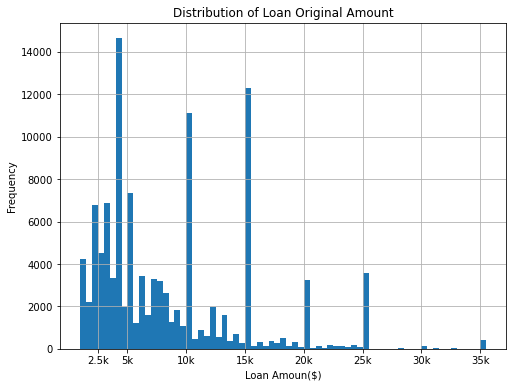

In [49]:
# histogram plot of LoanOriginalAmount distribution
plt.figure(figsize=(8, 6))
bins = np.arange(1000, 36000, 500)
Clean_loan_data['LoanOriginalAmount'].hist(bins=bins)
plt.xlabel('Loan Amoun($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Original Amount')

plt.xticks([2.5e3, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['2.5k', '5k', '10k', '15k', '20k', '25k', '30k', '35k']);

Observation; From the spike in the graph it shows the loan original amount is in multiple of 5000 dollars and the loan  with the highest frequency is 4000 dollars


#### Question; Distribution of monthly loan payment

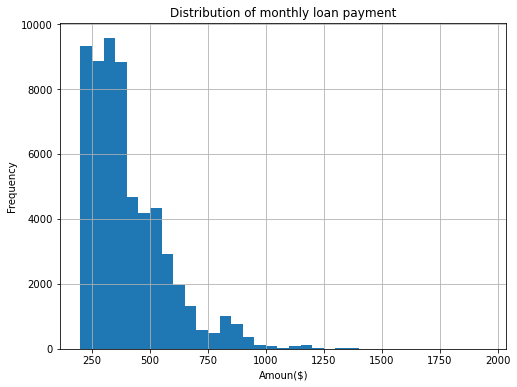

In [50]:
# histogram of monthly loan payment distribution
plt.figure(figsize=(8, 6))
bins = np.arange(200, 2000,50)
Clean_loan_data['MonthlyLoanPayment'].hist(bins=bins)
plt.xlabel('Amoun($)')
plt.ylabel('Frequency')
plt.title('Distribution of monthly loan payment');


Observation; the distribution is right skewed,People whose monthly loan payment is less than 500 dollars are most of the customers,few people have montly loan payment above 1000 dollars

#### Question; Distribution of Loan Term

In [51]:
# valuecount of loan term
term_value = Clean_loan_data['Term'].value_counts()
term_value 

36    87224
60    24228
12     1614
Name: Term, dtype: int64

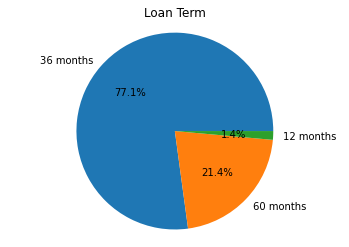

In [52]:
# bar plot of term
Term_value= [87224,24228,1614]
my_labels = '36 months','60 months','12 months'
plt.pie(Term_value,labels=my_labels,autopct='%1.1f%%')
plt.title('Loan Term')
plt.axis('equal')
plt.show()

Observation; most customers of about 77.1% subscribe to the 36months loan term while the 12month is the least subscribed

#### Question; Distribution of LoanStatus

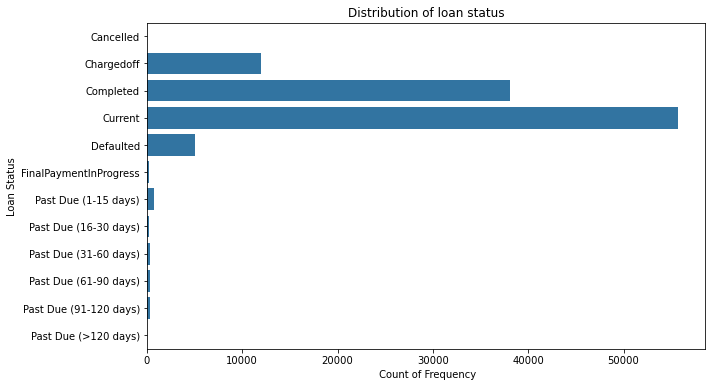

In [53]:
# distribution of loanstatus
plt.figure(figsize=(10, 6))
sns.countplot(data= Clean_loan_data, y='LoanStatus',color = sns.color_palette()[0])
plt.xlabel(' Count of Frequency')
plt.ylabel('Loan Status')
plt.title('Distribution of loan status');

Obervation; The most frequent loanstatus is the current 

#### Question; Distribution of borrowers APR 

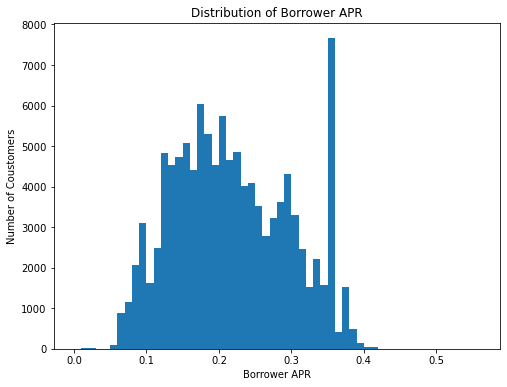

In [54]:
# distribution of borrowers APR
bins = np.arange(0, Clean_loan_data.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 6])
plt.hist(data = Clean_loan_data, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Number of Coustomers')
plt.title('Distribution of Borrower APR');


Obervation; The distribution of Borrower APR looks multimodal, with a small around 0.1,another large peak centered at 0.2, and the sharpest peak between  0.30 and 0.36 and non beyond 0.45

#### Question; Distribution of listing category/Loan purpose

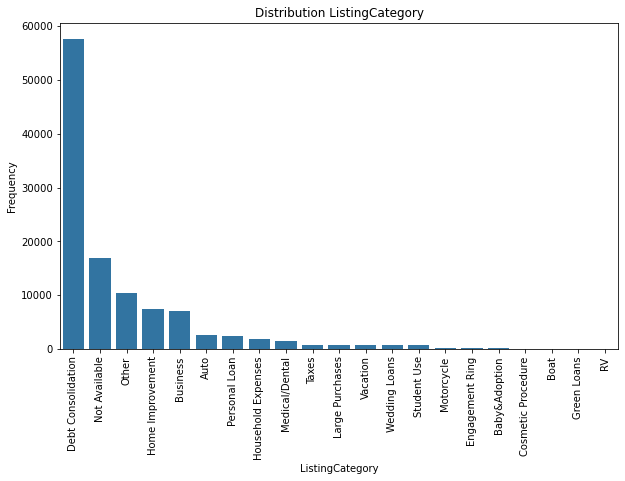

In [55]:
# countplot of listing category
plt.figure(figsize=(10, 6))
sns.countplot(data = Clean_loan_data, x = 'ListingCategory', order = Clean_loan_data['ListingCategory'].value_counts().index,color = sns.color_palette()[0])
plt.xlabel('ListingCategory')
plt.ylabel('Frequency')
plt.title('Distribution ListingCategory');
plt.xticks(rotation=90);

Obervation; From the graph its shown that majority of the loan is debt condsolidated loan

#### Question; Graph of how loan was distributed among the states

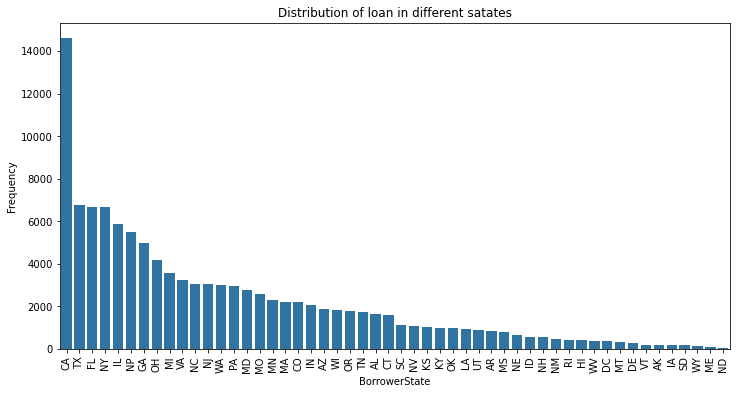

In [56]:
# countplot of borrowerstate
plt.figure(figsize=(12, 6))
sns.countplot(data = Clean_loan_data, x = 'BorrowerState', order = Clean_loan_data['BorrowerState'].value_counts().index,color = sns.color_palette()[0])
plt.xlabel('BorrowerState')
plt.ylabel('Frequency')
plt.title('Distribution of loan in different satates')
plt.xticks(rotation=90);

CA i.e California is where most loan was taken from this could be due to California population as its the largest state in USA and ND i.e North Dakota being a reasonably small size population

#### Distribution of EnployementStatus,Income Range,ListingYear and Rating

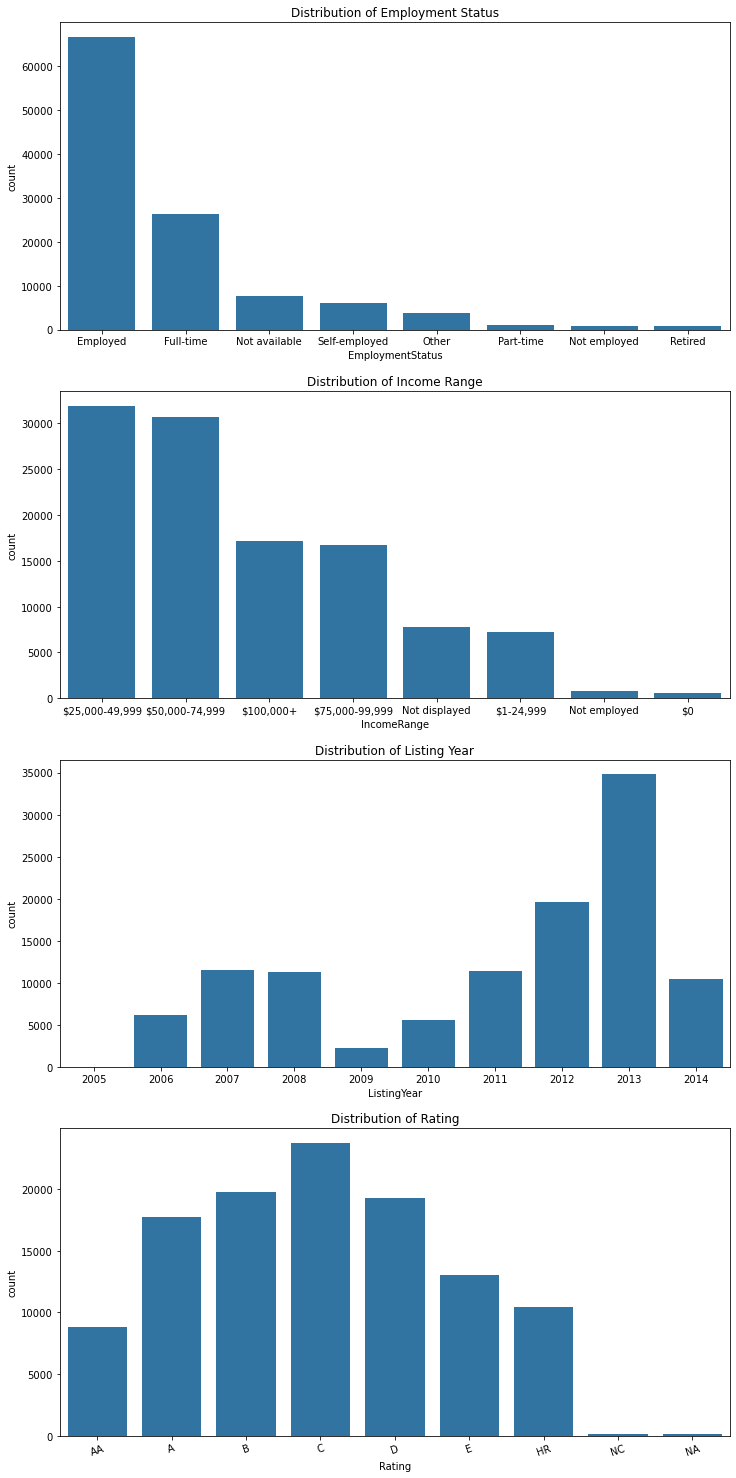

In [57]:
# a subplot function that shows the distribution of employementstatus,incomerange,listingyear and rating
fig, ax = plt.subplots(nrows=4, figsize = [12,26])
default_color = sns.color_palette()[0]
sns.countplot(data = Clean_loan_data, x = 'EmploymentStatus', order = Clean_loan_data['EmploymentStatus'].value_counts().index,color = default_color, ax = ax[0])
sns.countplot(data = Clean_loan_data, x = 'IncomeRange', order = Clean_loan_data['IncomeRange'].value_counts().index,color = default_color, ax = ax[1])
sns.countplot(data = Clean_loan_data, x = 'ListingYear',color = default_color, ax = ax[2])
sns.countplot(data = Clean_loan_data, x = 'Rating' ,color = default_color, ax = ax[3])
ax[0].title.set_text('Distribution of Employment Status')
ax[1].title.set_text('Distribution of Income Range')
ax[2].title.set_text('Distribution of Listing Year')
ax[3].title.set_text('Distribution of Rating')
plt.xticks(rotation=19);

Observations;
1) from the distribution of employement status,self employed are the most people given loan to and this is because of the ability to pay back ,unlike the unmployed and retired where where the chances of payment is slim.

2) the highest customer is from clientwithin the salary range of 25000-74999 dollars

3) the year which most loan was collcected is 2013 and this could be due to the economic crisis at the period 

4) most of the loan are rated'C'

#### Distribution of debtincome ratio 

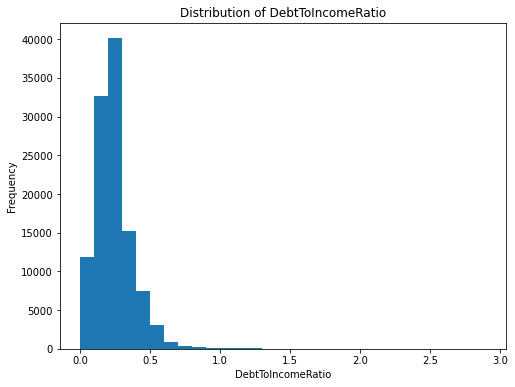

In [58]:
#Histogram plot of  debtincome ratio 
bins = np.arange(0,3,0.1)
plt.figure(figsize=[8, 6])
plt.hist(data = Clean_loan_data, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Frequency')
plt.title('Distribution of DebtToIncomeRatio');

Obervation; The debt income ration with the highest frequency is approximately 0.02

#### Distribution of StatedMonthlyIncome

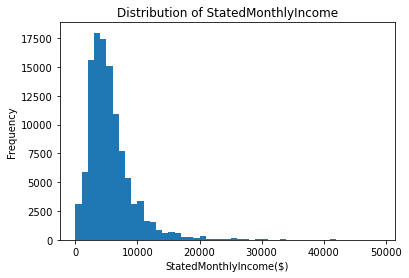

In [59]:
# Distribution of StatedMonthlyIncome
bins_smi = np.arange(0, 50000, 1000)
plt.hist(data = Clean_loan_data , x = 'StatedMonthlyIncome', bins=bins_smi)
plt.xlabel('StatedMonthlyIncome($)')
plt.ylabel('Frequency')
plt.title('Distribution of StatedMonthlyIncome');

Obervation; the satated income distribution is skewed towards right,with majority income less than 30,000 and the stated monthly income with highest frequency being around 3000 dollars

## General observation of the univariate analysis

Majority of the loan was taken in year 2013 by persons in Califonia,Most of which are intermediate loans with 36 months of repayment and are mostly used for debt consolidation.mostly these loans are given to employed persons with an income range of $25,000 -$49,999 and debttoincome ratio less than 50% 

## Were there any unusual points? Did you need to perform any transformations?

There is no irregularities in the distribution of the APR. Distribution is multimodal,no need for transformation

## Of the features investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Ordering and setting categorical data for some data such  as ;Rating,IncomeRange,term and loanstatus

## 4.0 Bivariate Exploration

#### Question; What is the relationship between the numeric variable in the data

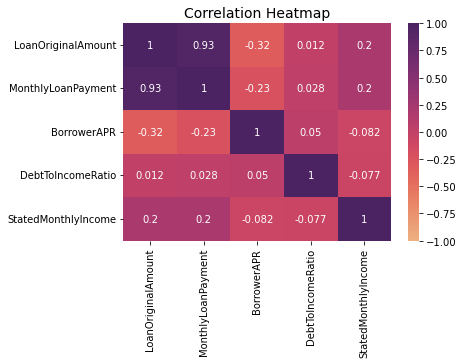

In [60]:
 #heat map to see correlation between features
loan_corr = Clean_loan_data.corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="flare")
plt.title("Correlation Heatmap",fontsize=14)
plt.show()

Obervations;
1. loan original amount is highly positively correlated to monthly loan payment,i.e the higher the original loan amount the highly the monthly loan payment

2. there is a small positive correlation between stated monthly income and loan original amount i.e the higher the stated income the higher the loan original amount

3. there is a small positive correlation between stated monthly income and monthly loan payment i.e the higher the stated income the higher the monthly loan payment

4. There is a small negative correlation between BorrowerAPR and loan original amount. The higher the BorrowerAPR, the lower the loan amount

5. There is a small negative correlation between BorrowerAPR and monthly loan payment. The higher the BorrowerAPR, the lower the monthly loan payment

#### Question; what is the relationship between loan original amount and borrower APR

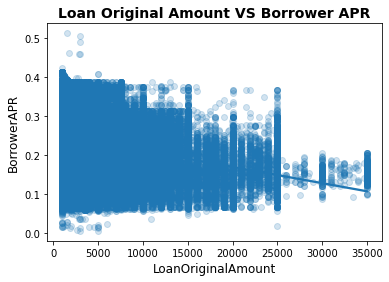

In [61]:
# regplot of loan original amount and borrower APR
sns.regplot(data=Clean_loan_data,x='LoanOriginalAmount',y='BorrowerAPR',scatter_kws={'alpha':1/5})
plt.xlabel('LoanOriginalAmount',fontsize=12)
plt.ylabel('BorrowerAPR',fontsize=12)
plt.title('Loan Original Amount VS Borrower APR',weight = 'bold', fontsize=14);

Obervation; here there is a negative relationship between the two variables ,the higher the original loan amount,the lower the borrowerARP

#### Question; What is the relationship between BorrowerAPR and MonthlyLoanPayment

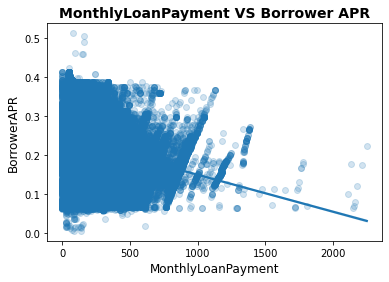

In [62]:
# Relationship between BorrowerAPR and MonthlyLoanPayment
sns.regplot(data=Clean_loan_data,x='MonthlyLoanPayment',y='BorrowerAPR',scatter_kws={'alpha':1/5})
plt.xlabel('MonthlyLoanPayment',fontsize=12)
plt.ylabel('BorrowerAPR',fontsize=12)
plt.title('MonthlyLoanPayment VS Borrower APR',weight = 'bold', fontsize=14);

Obervation; borrowerARP and monthly loan payment are negatively correlated ,the higher the monthly loan payment ,the lower the borrowerARP

#### Question: Which loan term is the most common

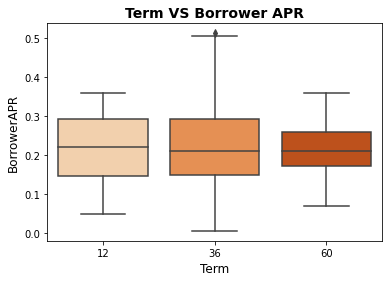

In [63]:
# boxplot of BorrowerAPR and  loan Term
sns.boxplot(data = Clean_loan_data, x = 'Term', y= 'BorrowerAPR', palette = 'Oranges')
plt.xlabel('Term',fontsize=12)
plt.ylabel('BorrowerAPR',fontsize=12)
plt.title('Term VS Borrower APR',weight = 'bold', fontsize=14);

Obervation; the Borrower APR is highest at 12 and 36 months and least at 60 months

#### Question; What is the correlation of BorrowerAPR with EmployementStatus

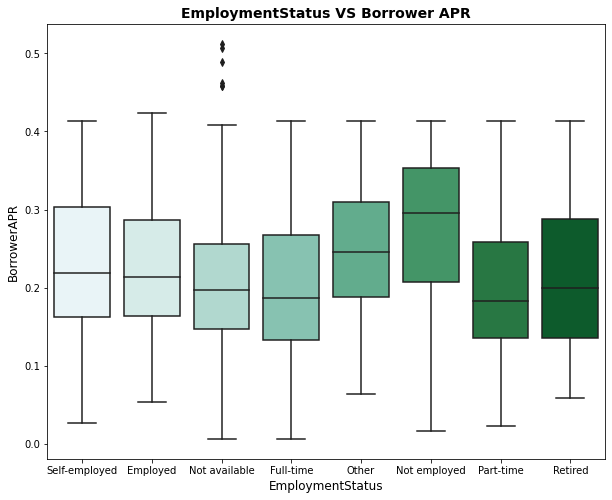

In [64]:
# boxplot showing relationship between EmploymentStatus and Borrower APR
plt.figure(figsize = [10, 8])
sns.boxplot(data = Clean_loan_data, x = 'EmploymentStatus', y= 'BorrowerAPR', palette = 'BuGn')
plt.xlabel('EmploymentStatus',fontsize=12)
plt.ylabel('BorrowerAPR',fontsize=12)
plt.title('EmploymentStatus VS Borrower APR',weight = 'bold', fontsize=14);

Obervation; BorrowerAPR is highest in unemployed

#### Question; Which LoanStatus has the highest or lowest BorrowerAPR 

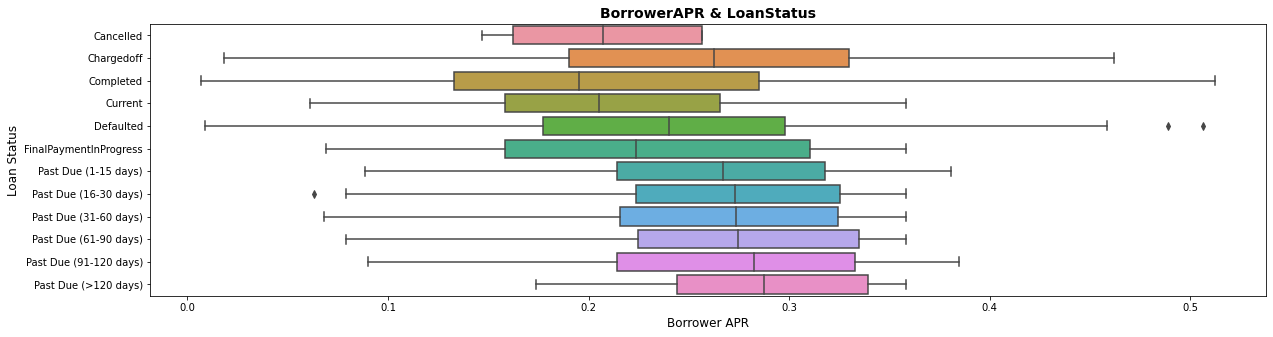

In [65]:
# box plot of BorrowerAPR & LoanStatus
plt.figure(figsize = [20, 5])


sns.boxplot(data= Clean_loan_data,x='BorrowerAPR',y='LoanStatus')
plt.xlabel('Borrower APR',fontsize=12)
plt.ylabel('Loan Status',fontsize=12)
plt.title('BorrowerAPR & LoanStatus',weight = 'bold', fontsize=14);

Obervation; Current and completed loan status has lower BorrowerAPR compared to chargedoff status which has highest BorrowerAPR

#### Question; which income range has the highest BorrowerAPR

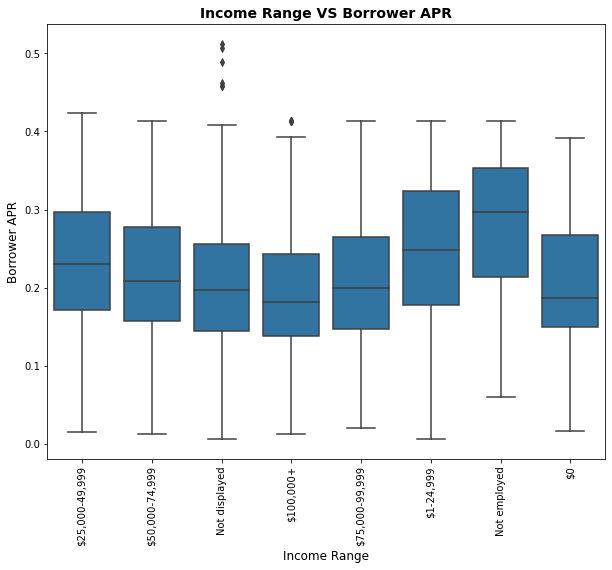

In [66]:
# boxplot of IncomeRange VS BorrowerAPR
plt.figure(figsize=(10,8))
sns.boxplot(data = Clean_loan_data, x = 'IncomeRange', y = 'BorrowerAPR',color = sns.color_palette()[0])
plt.xticks(rotation = 90)
plt.title('Income Range VS Borrower APR',weight = 'bold', fontsize=14)
plt.xlabel('Income Range',fontsize=12)
plt.ylabel('Borrower APR',fontsize=12);

Obervation; There is an negative correlation between income range andBorrowerAPR ,the higher the income the lower the BorrowerAPR,the unemployed category has the highest BorrowerAPR

#### Question; What is the top 10 loan ListingCategory according to purpose

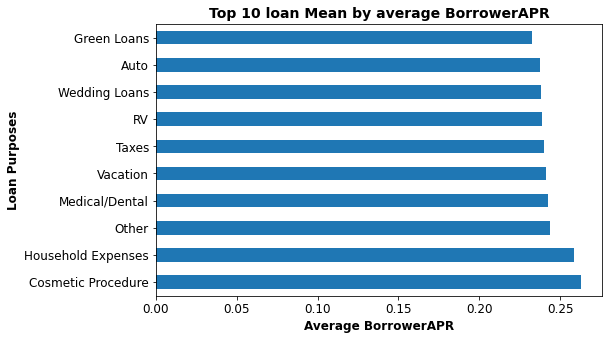

In [67]:
# Extract top 10 listing loan (loan purposes) by average BorrowerAPR
use_color = sns.color_palette()[0]
# use groupby method to get the top 10 loan listing
top10_loan_mean = Clean_loan_data.groupby('ListingCategory')['BorrowerAPR'].mean().sort_values(ascending=False).nlargest(10)

# plot a matplotlib barchrt
plt.figure(figsize=(8,5))
top10_loan_mean.plot(kind='barh',fontsize=12,color=use_color)
plt.xlabel('Average BorrowerAPR', weight = 'bold', fontsize=12)
plt.ylabel('Loan Purposes', weight = 'bold', fontsize=12)
plt.title("Top 10 loan Mean by average BorrowerAPR",weight = 'bold', fontsize=14);

Obervation; comestic procedure,house hold expenses have the highest borrower APR while Green Loans has the lowest with others at fairly equal point

#### Question; What is the relationship between DebtToIncomeRatio and BorrowerAPR

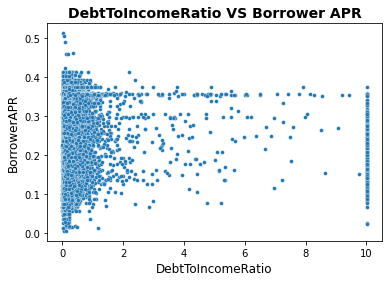

In [68]:
# plot of DebtToIncomeRatio VS Borrower APR
sns.scatterplot(data=Clean_loan_data, x='DebtToIncomeRatio', y='BorrowerAPR', s=15)
plt.xlabel('DebtToIncomeRatio',fontsize=12)
plt.ylabel('BorrowerAPR',fontsize=12)
plt.title('DebtToIncomeRatio VS Borrower APR',weight = 'bold', fontsize=14);

Obervation; there seems to be no correlation between DebtIncomeRatio and BorrowerAPR

#### Question; What is the relationship between StatedMonthlyIncome and BorrowerAPR

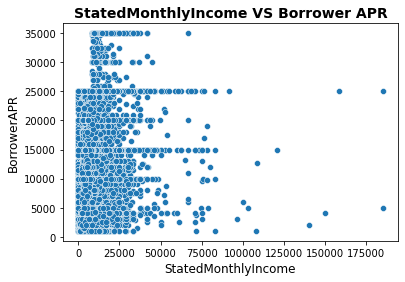

In [69]:
sns.scatterplot(data=Clean_loan_data[Clean_loan_data['StatedMonthlyIncome'] <= 0.2e6], x='StatedMonthlyIncome', y='LoanOriginalAmount')
plt.xlabel('StatedMonthlyIncome',fontsize=12)
plt.ylabel('BorrowerAPR',fontsize=12)
plt.title('StatedMonthlyIncome VS Borrower APR',weight = 'bold', fontsize=14);

Obervation; likewise there is no correlation

#### Question; Which Rating has the highest APR

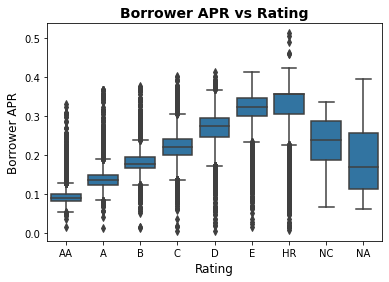

In [70]:
#Check the relationship between Rating and BorrowerAPR

sns.boxplot(data =Clean_loan_data, x = 'Rating', y = 'BorrowerAPR',color = sns.color_palette()[0])

plt.xlabel('Rating',fontsize=12)
plt.ylabel('Borrower APR',fontsize=12)
plt.title('Borrower APR vs Rating',weight = 'bold', fontsize=14);

Obervation; there is a negative relationship between the prosper rating and the borrowers APR,at highest rating the Borrower APR is lowest while the BorrowerAPR is highest when the rating is low/risky

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The borrower APR is negatively correlated with the loan original amount, which means the more the loan amount, the lower the APR.likewise there is negative relationship between the BorrowerAPR and monthlyloanpayment.
Unemployed borrowers have greater APR this could be due to low chances of low repayment while  employed borrowers have the least APR.likewise the loan status play important role in determinging the borrowersAPR,completed or current loan status have lower APR while chargedoff has the highest APR.
I also observed that high income range comes with low APR

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The rating has effect on the BorrowerAPR,loan with high rating has low BorrowerAPR and vice versa

## 5.0 Multivariate Exploration

### Selection of random sample for better visualization

In [71]:
# extracting a sample size of 1000 from the total population
np.random.seed(2020)
samples = np.random.choice(a = Clean_loan_data.shape[0],size = 1000, replace = False)
sample_data = Clean_loan_data.iloc[samples]

In [72]:
# confirm the shape and info of the sample data
print(sample_data.shape)
sample_data.info()

(1000, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 18311 to 105289
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ListingKey           1000 non-null   object        
 1   ListingCreationDate  1000 non-null   datetime64[ns]
 2   LoanOriginalAmount   1000 non-null   int64         
 3   MonthlyLoanPayment   1000 non-null   float64       
 4   Term                 1000 non-null   category      
 5   LoanStatus           1000 non-null   category      
 6   BorrowerAPR          1000 non-null   float64       
 7   ListingCategory      1000 non-null   object        
 8   BorrowerState        1000 non-null   object        
 9   EmploymentStatus     1000 non-null   object        
 10  DebtToIncomeRatio    1000 non-null   float64       
 11  IncomeRange          1000 non-null   object        
 12  StatedMonthlyIncome  1000 non-null   float64       
 13  ListingYear     

#### Question; What is the relationship between LoanOriginalAmount, MonthlyLoanPayment and term

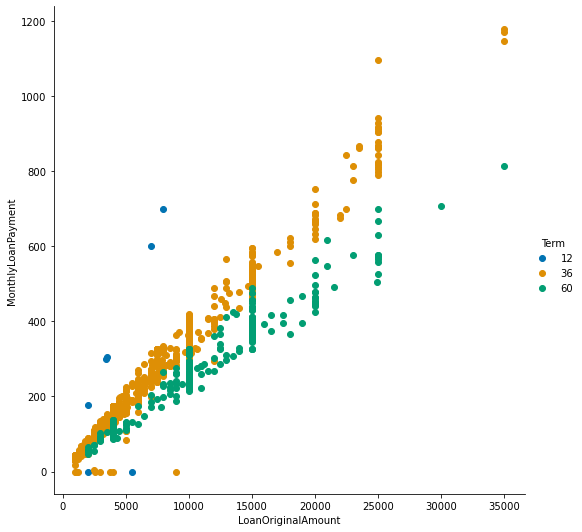

In [73]:
# relationship between LoanOriginalAmount, MonthlyLoanPayment and term
g = sns.FacetGrid(data = sample_data, hue = 'Term', size = 7.5, palette = 'colorblind')
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend();

Obervation; The higher the loan the higher the monthlyloanpayment,there is no 12 months loan term for loanoriginal amount greater than 10,000 dollars

#### Question; Distribution of loan original amount over the years and the income range

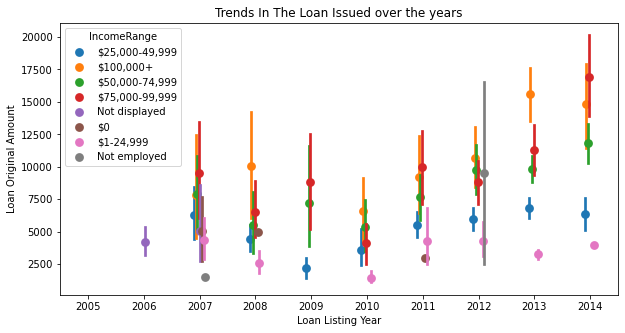

In [74]:
# plotting the yearly trend for each loan amount for each income range
plt.figure(figsize=[10,5])
sns.pointplot(data= sample_data, x='ListingYear', y='LoanOriginalAmount', linestyles='', hue='IncomeRange', dodge=True)
plt.xlabel('Loan Listing Year')
plt.ylabel('Loan Original Amount')
plt.title('Trends In The Loan Issued over the years');

Obervation; There seems to be increase in the amount of loan given from 2010 to 2014,and the predominant income range for the loan is from 50,000 and above


#### Define a function to plot a Scatterplot showing how the features relate with Loan Orginal Amount and BorrowerAPR

In [75]:
def plotfacetgrid(hue):
    g = sns.FacetGrid(data = sample_data, hue = hue, size = 8)
    #setting the variable and labelling  for the scatterplot
    g.map(plt.scatter,'BorrowerAPR', 'LoanOriginalAmount')
    g.set(yscale = 'log')
    plt.ylabel('LoanOriginalAmount (Log Transformed)',fontsize = 12)
    plt.xlabel('BorrowerAPR',weight = "bold", fontsize = 12)
    plt.legend(title= hue , loc = "center left", bbox_to_anchor = (1, 0.5))
    plt.title('BorrowerAPR and LoanOrginal Amount for '+hue, weight = "bold", fontsize = 14)
    plt.yticks([1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,1e4,1.5e4,2e4,2.5e4,3e4,3.5e4,4e4], ['1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','3ok','35k','40k']);

#### Question;What is the relationship between BorrowerAPR, LoanOriginalAmount and income range

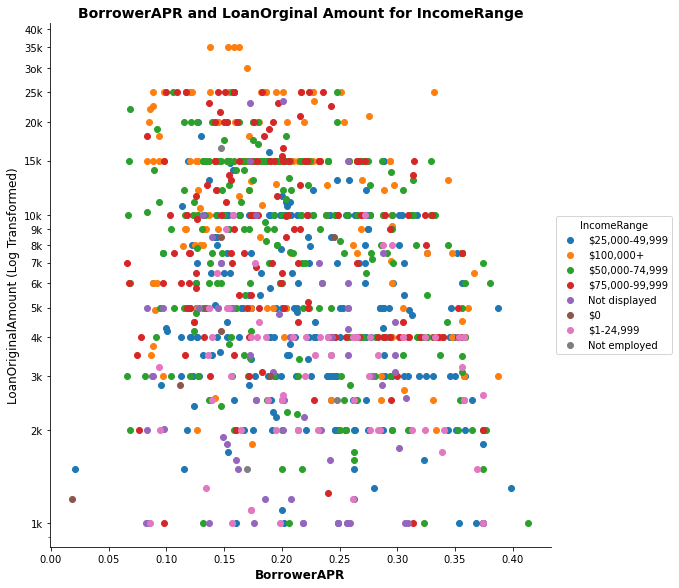

In [76]:
plotfacetgrid('IncomeRange')

Obervation; IncomeRange looks well  distributed,High incomes earners can take higher amount of loan

#### Question;What is the relationship between BorrowerAPR, LoanOriginalAmount and loan term

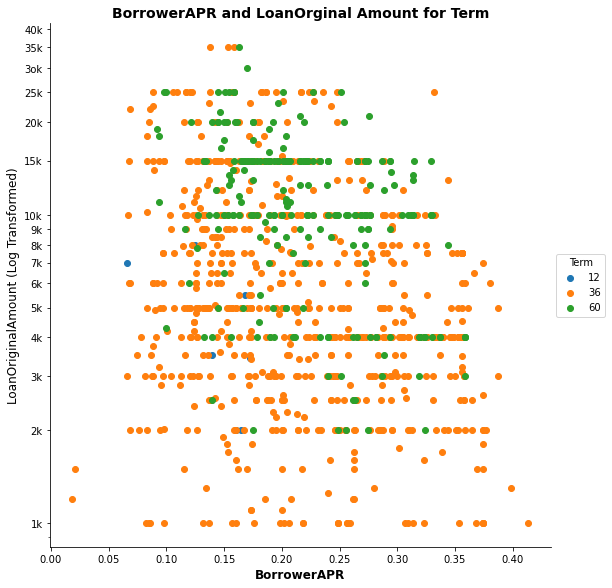

In [77]:
plotfacetgrid('Term')

Obervation; it can be observed that longer loan term is provided for higher amount of loan

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is no 12 months loan term for loanoriginal amount greater than 10,000 dollars and there seems to be increase in the amount of loan given from 2010 to 2014,and the predominant income range for the loan is from $25,000 and above,


### Were there any interesting or surprising interactions between features?

i observed that loan is given to most  unemployed people in 2012 which go against my previous finding,this could be due to outlier though

### 6.0 Conclusions

In conclusion factors that determines the BorrowerAPR from the selected features for this analysis are ;
Employement status
Loan status
Income range
Listing category 
Rating

### 7.0 Sources
https://www.infoplease.com/us/states/state-population-by-rank

https://seaborn.pydata.org/tutorial/color_palettes.html

https://knowledge.udacity.com

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

